# Training Overview

> Summary: This notebook is an overview of the training modules in the `fastai` library. It's will introduce the notion of Learner, metrics, and callback

## Modules overview

The core learning process is wrapper around the class `Learner`.  This object binds a

* **dataset** (Pytorch)
* **Model**   (Pytorch neural network model)

* **Optimizer** 
* **Loss Function**

the class is defined in [basic_train](https://docs.fast.ai/basic_train.html#basic_train).

`callback` defines **Callback** and **CallbackHandler** that are responsible for the communication between the training loopo and the *Callback*'s.

Some modules deals the scheduling the *learning rate* like the `callbacks.lr_finder`. Ohters alow special kinds of trainking like `callbacks.fp15` wich uses 16 bits encoded floating points

Lastly `metrics` contains the functions you maght use to evaluate your training results. 

## Walk-trhough of key fonctionalities

Let's quickly overview the keys pieces of the trianing module. Let's pload the simple `MNIST` data and try to classify the data

In [1]:
from fastai.vision import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

[PosixPath('/home/anass/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/home/anass/.fastai/data/mnist_sample/valid'),
 PosixPath('/home/anass/.fastai/data/mnist_sample/train')]

In [6]:
#loading the data which seperated by folder
data = ImageDataBunch.from_folder(path)

the `MNIST_SAMPLE` contains only two digits

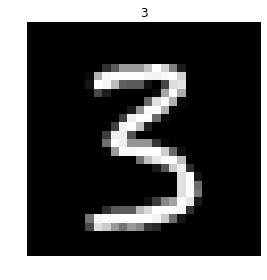

In [9]:
data.show_batch(1)

## Basic Training with Learner

Let's create a **Convolutional Neural Network** to classify the data

In [11]:
model = simple_cnn((3,16,16,2))
model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
  )
  (1): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
  )
  (2): Sequential(
    (0): Conv2d(16, 2, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace)
  )
  (3): Sequential(
    (0): AdaptiveAvgPool2d(output_size=1)
    (1): Flatten()
  )
)

In [13]:
# This is simply and torch.nn
print(type(model)) 

<class 'torch.nn.modules.container.Sequential'>


Let's now create a learner from the the **data** and the **model**

In [14]:
learner = Learner(data, model)

In [17]:
learner.fit(1)

epoch,train_loss,valid_loss,time
0,0.118959,0.101778,00:10


To see how well our module is doing we will add a `metric`

In [18]:
learner.metrics = [accuracy]
learner.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.076229,0.067646,0.974485,00:08


## Extending a learner with callbacks

callback are a way to modify the trainin in almost any way you imagine. For instance, let's use the Leslie Smith's **1 cycle** training method

In [25]:
learner.fit_one_cycle(1,max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.070537,0.052406,0.983808,00:08


A second useful **Callback** is a recorder with show informations about the training

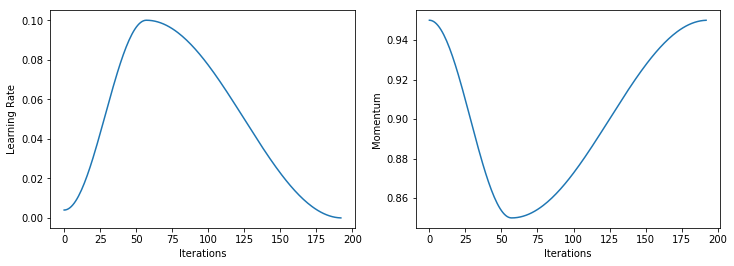

In [26]:
learner.recorder.plot_lr(show_moms=True)